# 🚀 Jaaie | Task 3 – Linear Regression  
## Elevate Labs AI/ML Internship

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Data Loading and Preprocessing

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
df = pd.read_csv(data_path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [28]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [42]:
# Create a copy of the original
data = df.copy()

In [43]:
# Check column values before mapping
print(data['mainroad'].unique())

['yes' 'no']


In [44]:
# Step 3: Binary encoding
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].map({'yes': 1, 'no': 0})

In [45]:
# Step 4: One-hot encode furnishingstatus
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
# Convert True/False to int
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## 2. Simple Linear Regression

### 2.1 Train-Test Split

In [48]:
# Using only 'area' column to predict price (simple regression)
# Define feature and target
X = data[['area']]
y = data['price']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 1)
X_test shape: (109, 1)
y_train shape: (436,)
y_test shape: (109,)


### 2.2 Model Training

In [60]:
# Training the linear regression model
model = LinearRegression()

In [61]:
# Train the model on training data
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [54]:
print("Intercept (β0):", model.intercept_)
print("Coefficient (β1):", model.coef_[0])

Intercept (β0): 2512254.2639593435
Coefficient (β1): 425.72984193878284


**Model Coefficients (Simple Regression):**  
The model learned that for every extra 1 sq.ft. of area, the price increases by approx ₹425.  
The intercept value represents the base price when area = 0, which is not realistic but useful in the equation.

### 2.3 Regression Line Plot

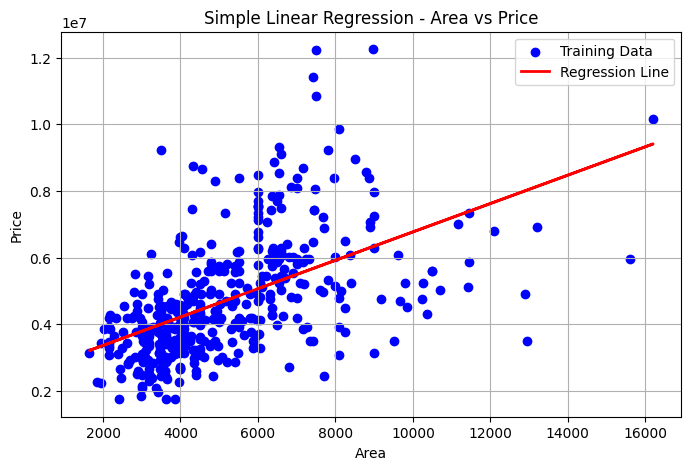

In [63]:
# Predict using model (on training set, for line plotting)
y_pred_line = model.predict(X_train)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_pred_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression - Area vs Price')
plt.legend()
plt.grid(True)
plt.show()


### Regression Line Plot (Simple Linear Regression)

This plot shows the relationship between house area and price.  
The blue dots are the actual data points, and the red line is the predicted price from the model.

The spread of dots around the line shows that area alone doesn’t explain price very well. Some points are far from the line, meaning the model makes large errors in those cases.

That’s why the R² score was low — we need more features to improve accuracy.


### 2.4 Evaluation Metrics

In [64]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R² Score: 0.27287851871974644


**Simple Regression Results:**  
- MAE is around ₹14.7L → average prediction error is quite high.  
- R² is 0.27 → the model explains only 27% of price variation using area alone.  
That means area alone is not enough to predict price accurately.



## 3. Multiple Linear Regression

### 3.1 Train-Test Split

In [66]:
# Define X and Y
X = data.drop('price', axis=1)  # All columns except price
y = data['price']               # Target variable

In [67]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


### 3.2 Model Training

In [69]:
# Create and train the model
model = LinearRegression()
_ = model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


### 3.3 Evaluation Metrics


In [70]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.6633
R² Score: 0.6529242642153185


**Multiple Regression Results:**  
- MAE dropped to ₹9.7L → better than simple regression.  
- R² improved to 0.65 → now the model explains 65% of the variation in price.  
This confirms that using multiple features improves prediction accuracy.

### 3.4 Coefficients

In [71]:
# Check model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


**Model Coefficients (Multiple Regression):**  
Each feature now has its own effect on the predicted price. For example:
- Every extra bathroom adds about ₹10.9 lakh to the predicted price.
- Air conditioning increases the price by - ₹7.9 lakh.
- If a house is unfurnished, the predicted price drops by about ₹4.1 lakh.

This makes sense because features like number of bathrooms, location, and air conditioning are usually important factors when pricing a house.


### 3.5 Actual vs Predicted Plot

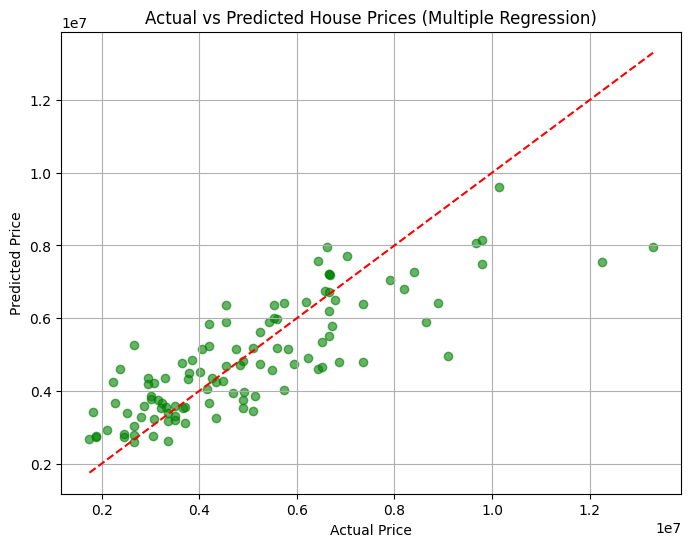

In [72]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Multiple Regression)')
plt.grid(True)
plt.show()


**Actual vs Predicted Plot:**  
Most of the points are close to the diagonal, which means the predictions are reasonably close to actual values.  
Some spread is still visible, especially at higher prices — showing there's still room to improve.

## 4. Conclusion

- We first applied simple linear regression using only the `area` feature. The R² score was 0.27, indicating limited explanatory power.
- We then built a multiple linear regression model using all features. This improved R² to 0.65 and significantly reduced error.
- Visual analysis and coefficient interpretation revealed that features like `bathrooms`, `airconditioning`, and `furnishingstatus` strongly influence price.

This was a useful task to get hands-on with regression and understand how features affect prediction. I also learned how to evaluate models using MAE, MSE, and R², and how to visualize the results.
